# Implementation of Neural Networks with TensorFlow

In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
tf.__version__

'2.12.0'

In [7]:
keras.__version__

'2.12.0'

## Building an Image Classifier Using the Sequential API 

First, we need to load a dataset. In this chapter we will use Fashion MNIST, which consists of 70,000 grayscale images of 28 × 28 pixels each, with 10 classes

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one important difference is that every image is represented as a 28 × 28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0). Let’s take a look at the shape and data type of the training set:

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

uint8 is a numpy data type. It is a 8 bit integer and range value is (0 to 255).

Note that the dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now. Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [11]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [12]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#### We need the list of class names to know what we are dealing with:

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

For example, the first image in the training set represents a coat:

In [14]:
class_names[y_train[0]]

'Coat'

#### Samples from the Fashion MNIST dataset

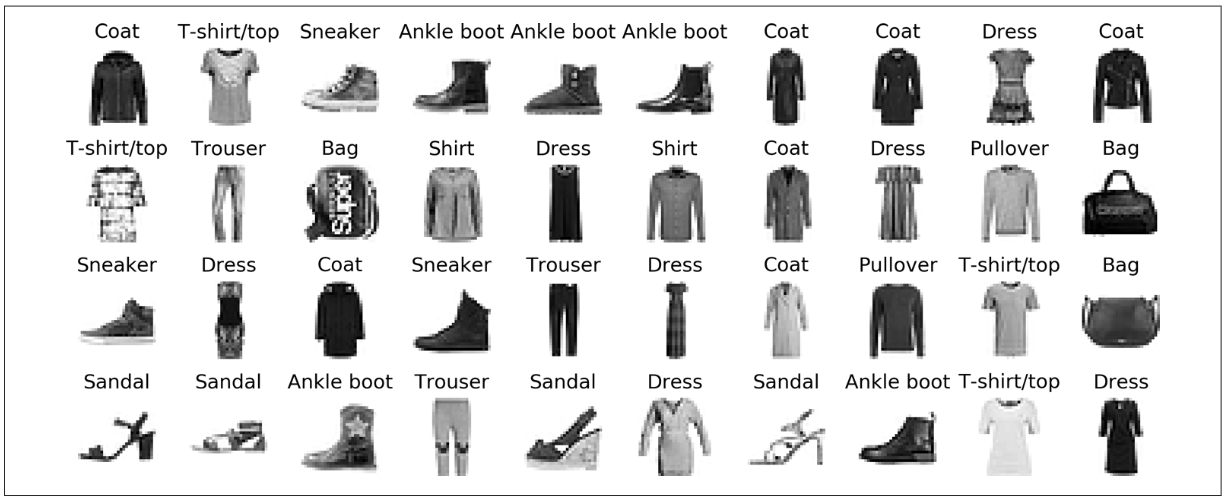

## Creating the model using the Sequential API 

Now let’s build the neural network! Here is a classification MLP with two hidden layers:

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

NOTES:
1. The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.
2. Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 1). This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the input_shape, which doesn’t include the batch size, only the shape of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer, setting input_shape=[28,28].
3. Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vec‐ tor of bias terms (one per neuron). 
4. Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.
5. Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


The model’s summary() method displays all the model’s layers, including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters. Here we only have trainable parameters.

## Compiling the model 

After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation.

First, we use the "sparse_categorical_cross entropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classification (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss. Regarding the optimizer, "sgd" means that we will train the model using simple Stochastic Gradient Descent. In other words, Keras will perform the backpropagation algorithm. Finally, since this is a classifier, it’s useful to measure its "accuracy" during training and evaluation.

In [17]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


## Training the model 

We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional). Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set).

In [18]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7091 - accuracy: 0.7678 - val_loss: 0.5028 - val_accuracy: 0.8334
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4833 - accuracy: 0.8316 - val_loss: 0.4480 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4406 - accuracy: 0.8457 - val_loss: 0.4133 - val_accuracy: 0.8586
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4140 - accuracy: 0.8552 - val_loss: 0.3995 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3924 - accuracy: 0.8633 - val_loss: 0.3784 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3782 - accuracy: 0.8671 - val_loss: 0.3678 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3637 - accuracy: 0.8709 - val_loss: 0.3570 - val_accuracy:

The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a pandas DataFrame and call its plot() method, you get the learning curves 

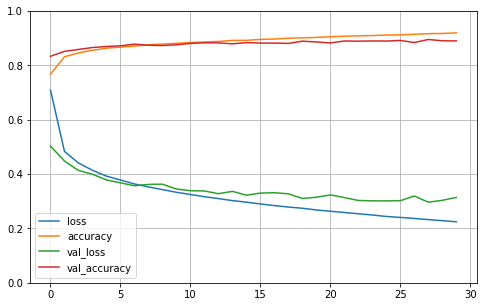

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()


You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease.

## Evaluate the model 

Once you are satisfied with your model’s validation accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the evalu ate() method

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 74.8021 - accuracy: 0.8376


[74.8021469116211, 0.8375999927520752]

## Using the model to make predictions 

Use the model’s predict() method to make predictions on new instances. Since we don’t have actual new instances, we will just use the first three instances of the test set:

In [21]:
X_new = X_test[:3]

In [22]:
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 241ms/step


In [23]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

As you can see, for each instance the model estimates one probability per class, from class 0 to class 9. For example, for the first image it estimates that the probability of class 9 (ankle boot) is 100% and the probabilities of the other classes are negligible. If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the np.argmax method with axis-1 instead:

In [24]:
import numpy as np
predictions = np.argmax(model.predict(X_new), axis=-1)

1/1 [==============================] - 0s 103ms/step


In [25]:
predictions

array([9, 2, 1], dtype=int64)

In [26]:
np.array(class_names)[predictions]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Here, the classifier actually classified all three images correctly

In [27]:
y_new = y_test[:3]

In [28]:
y_new

array([9, 2, 1], dtype=uint8)

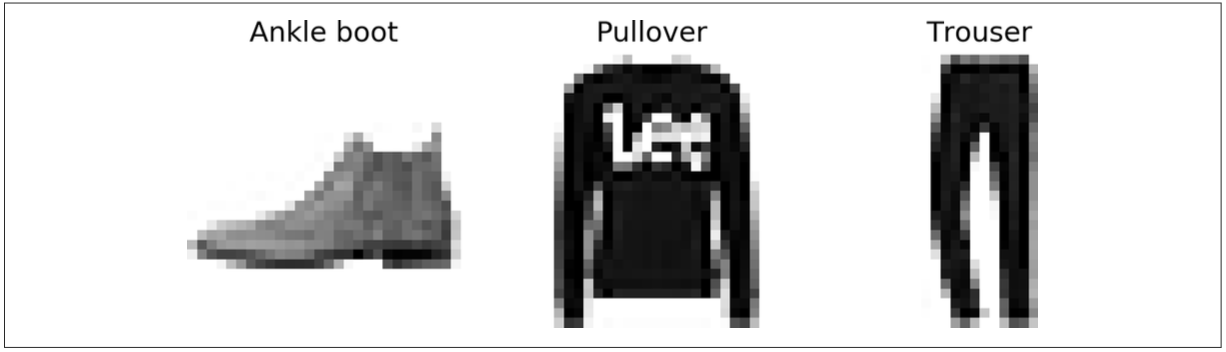